# MSDS 7331 - Lab One: Visualization and Data Processing

### Investigators
- [Matt Baldree](mailto:mbaldree@smu.edu?subject=lab1)
- [Tom Elkins](telkins@smu.edu?subject=lab1)
- [Austin Kelly](ajkelly@smu.edu?subject=lab1)
- [Murali Parthasarathy](mparthasarathy@smu.edu?subject=lab1)


<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Lab Instructions</h3>
    <p>You are to perform analysis of a data set: exploring the statistical summaries of the features,
visualizing the attributes, and making conclusions from the visualizations and analysis. Follow the
CRISP-DM framework in your analysis (you are not performing all of the CRISP-DM outline, only
the portions relevant to understanding and visualization). This report is worth 20% of the final
grade. Please upload a report (one per team) with all code used, visualizations, and text in a single
document. The format of the document can be PDF, *.ipynb, or HTML. You can write the report in
whatever format you like, but it is easiest to turn in the rendered iPython notebook.</p>
</div>

<a id='business_understanding'></a>
## Business Understanding
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Business Understanding (<b>10 points total</b>)</h3>
    <ol><li>Describe the purpose of the data set you selected (i.e., why was this data collected in
the first place?).</li>
    <li>Describe how you would define and measure the outcomes from the
dataset. That is, why is this data important and how do you know if you have mined
useful knowledge from the dataset?</li>
    <li>How would you measure the effectiveness of a
good prediction algorithm? Be specific.</li></ol>
</div>

### 1. Purpose of Data Set
The data set chosen for lab 1 is the 2015 Washington DC Metro Crime inspired from a Kaggle data set found at https://www.kaggle.com/vinchinzu/dc-metro-crime-data. The data set was obtained by following the steps found on the [Using the Crime Map Application](http://mpdc.dc.gov/node/200622) page. This site allowed us to download all eight wards from 01/01/2015 to 12/31/2015 as an exported CSV files. These individual ward files were then merged together into a single file for our use. This data set contains 36,493 entries and 18 attributes that are both continuous and discrete. This satisfies the data set requirement for a minimum of 30,000 entries and 10 attributes which are both continuous and discrete. Further definition of this data set will be discussed in the [Data Understanding](#data_understanding) section.

![Ward Map](images/wards_small.png "Washington DC Wards") 
<p style='text-align: center;'>
Washington DC Metro Ward Map
</p>

The crime data is published by the Washington DC Metro police department daily (see below image) to provide their residents a clear picture of crime trends as they actually happen. The data is shared with its residents such as Advisory Neighborhood Commissions to help the police determine how to keep neighborhoods safe. The data is also analyzed to determine the effectiveness of current investments such as putting more officers on the streets, buying police more tools, and launching community partnerships, see [Washington DC Metro Police Department report](http://mpdc.dc.gov/publication/mpd-annual-report-2015) for more details.

![Ward Map](images/dc_2015_crime.tiff "Washington DC Year End Crime Data") 
<p style='text-align: center;'>
Washington DC Metro 2015 Year End Crime Data
</p>

### 2. Importance of the Data Set
This data set could be used to predict the number of violent and property crimes in police district given time of day, day of week, and other factors. This would allow the police department to appropriate adequate resources to each district to respond and possibly prevent the crimes.

In addition, this data set could be used to whether a crime at a location is violent or propery crime based on history of other crimes near this location. This would be valuable if a potential crime was reported but the reporter was unsure of the type of crime or if the crime reported was unusual for this location.

### 3. Measurement of Importance
The measurement of the importance would be to perform a validation on the machine learning model that was trained on the data set to predict the number of crimes that would be committed in a police district. If the crime prediction for a location was used, then the model would be trained and validated against crimes by location. The prediction error would be reported for both scenarios.

<a id="data_understanding"></a>
## Data Understanding

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Data Understanding (<b>80 points total</b>)</h3>
    <ol><li>[<b>10 points</b>] Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file.</li>
    <li>[<b>15 points</b>] Verify data quality: Explain any missing values, duplicate data, and outliers.
Are those mistakes? How do you deal with these problems? Be specific.</li>
    <li>[<b>10 points</b>] Give simple, appropriate statistics (range, mode, mean, median, variance,
counts, etc.) for the most important attributes and describe what they mean or if you
found something interesting. Note: You can also use data from other sources for
comparison. Explain the significance of the statistics run and why they are meaningful.</li>
    <li>[<b>15 points</b>] Visualize the most important attributes appropriately (at least 5 attributes).
Important: Provide an interpretation for each chart. Explain for each attribute why the
chosen visualization is appropriate.</li>
    <li>[<b>15 points</b>] Explore relationships between attributes: Look at the attributes via scatter
plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain
any interesting relationships.</li>
    <li>[<b>10 points</b>] Identify and explain interesting relationships between features and the class
you are trying to predict (i.e., relationships with variables and the target classification).</li>
    <li>[<b>5 points</b>] Are there other features that could be added to the data or created from
existing features? Which ones?</li></ol>
</div>



### 1. Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

In [3]:
# Import the libraries we will need
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math

# Read in the crime data from the combined CSV file
dc = pd.read_csv('data/DC_Crime_2015.csv')

#### Information about Data Frame

In [4]:
# dataframe info
print(dc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36493 entries, 0 to 36492
Data columns (total 18 columns):
REPORT_DAT              36493 non-null object
SHIFT                   36493 non-null object
OFFENSE                 36493 non-null object
METHOD                  36493 non-null object
BLOCK                   36493 non-null object
DISTRICT                36446 non-null float64
PSA                     36445 non-null float64
WARD                    36493 non-null int64
ANC                     36493 non-null object
NEIGHBORHOOD_CLUSTER    36076 non-null object
BLOCK_GROUP             36379 non-null object
CENSUS_TRACT            36379 non-null float64
VOTING_PRECINCT         36480 non-null object
CCN                     36493 non-null int64
XBLOCK                  36493 non-null float64
YBLOCK                  36493 non-null float64
START_DATE              36493 non-null object
END_DATE                36241 non-null object
dtypes: float64(5), int64(2), object(11)
memory usage: 5.0+ 

#### Feature Summary Statistics

In [5]:
# summary statistics
print(dc.describe())

           DISTRICT           PSA          WARD  CENSUS_TRACT           CCN  \
count  36446.000000  36445.000000  36493.000000  36379.000000  3.649300e+04   
mean       3.697196    374.298395      4.421259   6211.275791  1.511937e+07   
std        1.947438    194.524001      2.339270   3146.217537  1.087825e+05   
min        1.000000    101.000000      1.000000    100.000000  6.155556e+06   
25%             NaN           NaN      2.000000           NaN  1.505885e+07   
50%             NaN           NaN      5.000000           NaN  1.511063e+07   
75%             NaN           NaN      6.000000           NaN  1.516497e+07   
max        7.000000    708.000000      8.000000  11100.000000  1.619697e+07   

              XBLOCK         YBLOCK  
count   36493.000000   36493.000000  
mean   399301.346694  137698.576414  
std      3113.115343    3424.503748  
min    390147.000000  127300.000000  
25%    397228.000000  136027.000000  
50%    398878.000000  137622.530000  
75%    401257.000000  

D:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


#### Example Record from Data Set

In [6]:
# print an example 
print(dc.ix[1234])

REPORT_DAT                                 06/24/2015 23:10
SHIFT                                              MIDNIGHT
OFFENSE                                         THEFT/OTHER
METHOD                                               OTHERS
BLOCK                   600 - 699 BLOCK OF MORTON STREET NW
DISTRICT                                                  3
PSA                                                     302
WARD                                                      1
ANC                                                      1A
NEIGHBORHOOD_CLUSTER                              Cluster 2
BLOCK_GROUP                                        003200 3
CENSUS_TRACT                                           3200
VOTING_PRECINCT                                 Precinct 38
CCN                                                15095285
XBLOCK                                               398044
YBLOCK                                               140473
START_DATE                              

#### Field Definitions
The [Crime Definitions](http://crimemap.dc.gov/CrimeDefinitions.aspx) provides detail definitions of codes used in this data set.

|Column|Data Type|Value Range|Description|Missing|
|:-----|:--------|:----------|:----------|:-----:|
|REPORT_DAT|Date/Time|01/01/2015 00:00:00 - 12/31/2015 23:59:59|The date/time the offense was *reported*|0|
|SHIFT|Nominal|Day = 0700-1500, Evening = 1500-2300, Midnight = 2300-0700|The duty shift that responded to the call|0|
|OFFENSE|Nominal|Various|The category of crime committed (from the Crime Definitions link above)|0|
|METHOD|Nominal|"OTHERS", "GUN", "KNIFE"|A qualifier to the Offense that flags special considerations, such as the use of a gun|0|
|BLOCK|Nominal|Varies|The street and block identifier|0|
|DISTRICT|Integer|1-7|The police district|47 (0.13%)|
|PSA|Integer|{1-7}(01-08}: 101-108,...,701-708|Police Service Area|48 (0.13%)|
|WARD|Integer|1-8|The political Ward identifier|0|
|ANC|Nominal|{1-8}{A-G}|Advisory Neighborhood Commission|0|
|NEIGHBORHOOD_CLUSTER|Nominal|"Cluster "{1-39}|Neighborhood identifier|417 (1.14%)|
|BLOCK_GROUP|Nominal|{CENSUS_TRACT}{space}{1-6}|Subdivision within a tract|114 (0.31%)
|CENSUS_TRACT|Integer|Discontinuous values between 100 and 11100|Land management tract identifier|114 (0.31%)|
|VOTING_PRECINCT|Nominal|"Precinct "{1-143}|Political subdivision|12 (0.03%)|
|CCN|Integer|Discontinuous values between 14151815 and 15403340|Criminal Complaint Number - unique to each report|0|
|XBLOCK|Ratio|min: 390,147; max: 407,806|Eastern coordinate of crime scene (meters)|0|
|YBLOCK|Ratio|min: 147,292; max: 127,300|Northern coordinate of crime scene (meters)|0|
|START_DATE|Date/Time|Varies|The earliest the crime *might* have been committed|0|
|END_DATE|Date/Time|Varies|The latest the crime *might* have been committed|252 (0.69%)|

Given that we have geo-physical coordinates, we believe we can impute some of the missing geo-political values (such as Police District).

### 2. Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Be specific.

#### Unique Data

- Block has 9,033 unique values indicating the street and block identifier. This value appears to be based on the CENSUS_TRACT variable, but with higher resolution. Mapping these unique values is time consuming and doesn't provide meaningful value for our QOI. Therefore, the column will be removed from the working data set. 
- Block Group has 450 unique values indicating the land management tract identifier. Mapping these unique values is time consuming and doesn't provide meaning value for our QOI. Therefore, the column will be removed from the working data set.

In [7]:
print np.count_nonzero(dc['BLOCK'].unique())
dc.drop('BLOCK', axis=1, inplace=True)

print np.count_nonzero(dc['BLOCK_GROUP'].unique())
dc.drop('BLOCK_GROUP', axis=1, inplace=True)

SyntaxError: invalid syntax (<ipython-input-7-61b95711c111>, line 1)

#### Missing Values Strategy

The strategy used for missing values is to ensure that each crime is associated with critical information. If any critical information is missing, then the row is deleted, otherwise an appropriate value will be imputed.

- The START_DATE and END_DATE are crime timestamp windows. START_DATE doesn't have any missing values. These values represent the span of time in which the crime *might* have been committed. There are a lot of missing values for the END_DATE field. For simplicity, END_DATE that have missing values, the START_DATE will be used. 
- If NEIGHBORHOOD_CLUSTER is missing, it will receive a 0 value which is not a valid cluster.
- If CENSUS_TRACK is missing, it will receive a 0 value which is not a valid tract.
- If VOTING_PRECINCT is missing, it will receive a 0 value which is not a valid precinct.
- If the PSA is missing, then compute mean XBlock/YBlock for each PSA. Estimate the PSA for the missing values based on proximity.  
- If the DISTRICT is missing, then compute the mean XBlock and YBlock values for each district. For each record missing a District value, compare the record's XBlock and YBlock to each District mean and report the district that is closest. Use that value to fill in the blank.

In [ ]:
# if END_DATE is NaN, then use START_DATE
dc['END_DATE'].fillna(dc['START_DATE'], inplace=True)

# if VOTING_PRECINCT is NaN, then set it to 0
dc['VOTING_PRECINCT'].fillna(0, inplace=True)

# if NEIGHBORHOOD_CLUSTER is NaN, then set it to 0
dc['NEIGHBORHOOD_CLUSTER'].fillna(0, inplace=True)

# if CENSUS_TRACT is NaN, then set it to 0
dc['CENSUS_TRACT'].fillna(0, inplace=True)

# if DISTRICT is NaN, then delete row
#dc.dropna(subset=['DISTRICT'], inplace=True)

# if PSA is NaN, then delete row
#dc.dropna(subset=['PSA'], inplace=True)

In [ ]:
#  Create a dataframe that holds the central location of each Police Service Area (PSA)
#  The PSAs are smaller than the Police Districts, so we should have better accuracy in identifying the associated PSA
#  The PSA ID contains the District ID, so we can impute the District from the PSA
psa_loc = pd.DataFrame(dc[['PSA','XBLOCK','YBLOCK']].groupby('PSA').median())

#  ---==< Estimate PSA membership based on proximity to each area's centroid >==---
def NearestPSA(myPSA,dX,dY):
    # Default to the current PSA ID
    nearestPSA = myPSA
    
    # Only operate on missing IDs
    if (pd.isnull(myPSA)):
        minDist = 9e99  # Set the initial closest distance to be a large value
        nearestPSA = 0
        
        # Loop through the records in the psa_loc dataframe
        for PSA_ID, PSA in psa_loc.iterrows():
            # Calculate the distance between the report and the current PSA
            thisDist = math.sqrt((dX - PSA['XBLOCK'])**2 + (dY - PSA['YBLOCK'])**2)
            
            # If this distance is smaller than the current minimum distance, update the minimum distance
            if (thisDist < minDist):
                minDist = thisDist # Replace the minimum distance with the current distance
                nearestPSA = PSA_ID # Remember which PSA this is related to
                
    # Return the ID for the closest PSA
    return [nearestPSA, int(nearestPSA / 100)]

#  Impute the missing PSA
dc['PSA_ID'] = 0
dc['DistrictID'] = 0
dc[['PSA_ID','DistrictID']] = list(map(NearestPSA,dc['PSA'],dc['XBLOCK'],dc['YBLOCK']))

#  Impute the missing District
#dc['DistrictID'] = list(map(NearestGroup,dc['DISTRICT'],dc['XBLOCK'],dc['YBLOCK']))
dc[dc['PSA'].isnull()]

#### Duplicate Data

- Four rows are duplicated in the data set. These will be removed.
- All other columns may be duplicated since there isn't a unique key column.

In [ ]:
# do we have duplicate rows?
print dc.duplicated().sum()

In [ ]:
# drop rows that are duplicated
dc.drop_duplicates(inplace=True)

#### Convert Data Frame Columns to Correct Data Type

All columns are converted to datetime, integer, or real data types. For VOTING_PRECINCT and NEIGHBORHOOD_CLUSTER, the prefix string is dropped leaving the integer identifier. For REPORT_DAT, START_DATE, and END_DATE, their time stamp was converted to a date time object. The remaining columns were converted to interger values. SHIFT, OFFENSE, METHOD, and ANC were mapped from the string values to integers.

<code>
shift_mapping = {'day':1, 'evening':2, 'midnight':3}
offense_mapping = {'theft/other':1, 'theft f/auto':2, 'burglary':3, 'assault w/dangerous weapon':4, 'robbery':5,
                  'motor vehicle theft':6, 'homicide':7, 'sex abuse':8, 'arson':9}
method_mapping = {'others':1, 'gun':2, 'knife':3}
anc_mapping = {'1B':1, '1D':2, '1A':3, '1C':4, '6E':5, '4C':6, '5E':7, '2B':8, '2D':9, '2F':10, '2C':11,
       '2E':12, '2A':13, '3C':14, '3E':15, '3B':16, '3D':17, '3F':18, '3G':19, '4A':20, '4B':21, '4D':22,
       '5A':23, '5D':24, '5C':25, '5B':26, '6A':27, '6C':28, '6B':29, '6D':30, '7D':31, '7C':32, '7E':33,
       '7B':34, '7F':35, '8A':36, '8B':37, '8C':38, '8D':39, '8E':40}
</code>


In [ ]:
# strip 'Precinct ' from VOTING_PRECINCT values
# http://stackoverflow.com/questions/13682044/pandas-dataframe-remove-unwanted-parts-from-strings-in-a-column
dc['VOTING_PRECINCT'] = dc['VOTING_PRECINCT'].apply(str).map(lambda x: x.lstrip('Precinct '))

# strip 'Cluster ' from NEIGHBORHOOD_CLUSTER values
dc['NEIGHBORHOOD_CLUSTER'] = dc['NEIGHBORHOOD_CLUSTER'].apply(str).map(lambda x: x.lstrip('Cluster '))

In [ ]:
# convert REPORT_DAT to datetime
dc['REPORT_DAT'] = pd.to_datetime(dc['REPORT_DAT'])

# convert SHIFT to int
shift_mapping = {'day':1, 'evening':2, 'midnight':3}
dc['SHIFT'] = dc['SHIFT'].str.lower().map(shift_mapping).astype(np.int64)

# convert OFFENSE to numeric
# Python for Data Analysis, pg. 279
offense_mapping = {'theft/other':1, 'theft f/auto':2, 'burglary':3, 'assault w/dangerous weapon':4, 'robbery':5,
                  'motor vehicle theft':6, 'homicide':7, 'sex abuse':8, 'arson':9}
dc['OFFENSE_Code'] = dc['OFFENSE'].str.lower().map(offense_mapping).astype(np.int64)

# convert METHOD to numeric
method_mapping = {'others':1, 'gun':2, 'knife':3}
dc['METHOD_Code'] = dc['METHOD'].str.lower().map(method_mapping).astype(np.int64)

# convert DISTRICT to numeric
dc['DistrictID'] = dc['DistrictID'].astype(np.int64)

# convert PSA to numeric
dc['PSA_ID'] = dc['PSA_ID'].astype(np.int64)

# convert WARD to numeric
dc['WARD'] = dc['WARD'].astype(np.int64)

# convert ANC to numeric
anc_mapping = {'1B':1, '1D':2, '1A':3, '1C':4, '6E':5, '4C':6, '5E':7, '2B':8, '2D':9, '2F':10, '2C':11,
       '2E':12, '2A':13, '3C':14, '3E':15, '3B':16, '3D':17, '3F':18, '3G':19, '4A':20, '4B':21, '4D':22,
       '5A':23, '5D':24, '5C':25, '5B':26, '6A':27, '6C':28, '6B':29, '6D':30, '7D':31, '7C':32, '7E':33,
       '7B':34, '7F':35, '8A':36, '8B':37, '8C':38, '8D':39, '8E':40}
dc['ANC'] = dc['ANC'].str.upper().map(anc_mapping).astype(np.int64)

# convert NEIGHBORHOOD_CLUSTER to numeric
dc['NEIGHBORHOOD_CLUSTER'] = dc['NEIGHBORHOOD_CLUSTER'].astype(np.int64)

# convert CENSUS_TRACT to numeric
dc['CENSUS_TRACT'] = dc['CENSUS_TRACT'].astype(np.int64)

# convert VOTING_PRECINCT to numeric
dc['VOTING_PRECINCT'] = dc['VOTING_PRECINCT'].astype(np.int64)

# convert CCN to numeric
dc['CCN'] = dc['CCN'].astype(np.int64)

# convert XBLOCK, YBLOCK to numeric
dc['XBLOCK'] = dc['XBLOCK'].astype(np.float64)
dc['YBLOCK'] = dc['YBLOCK'].astype(np.float64)

# convert START_DATE, END_DATE to dateime
dc['START_DATE'] = pd.to_datetime(dc['START_DATE'])
dc['END_DATE'] = pd.to_datetime(dc['END_DATE'])

print dc.info()
print
print dc.ix[1234]
print
print dc.describe()


#### Outliers

Thirty crimes were reported in 2015 which started before 2014. Six of the crimes started in 1915. Are these start dates in error or were these unsolved crimes recently solved through new technology advancements? Is it truly a 100-year-old cold case, or did the person simply enter the wrong century?

In [ ]:
print dc['START_DATE'][dc['START_DATE']<'1/1/2014'].count()
print sorted(dc['START_DATE'][dc['START_DATE']<'1/1/2014'])[:10]

#### New Features

Add new feature CRIME_TYPE to indicate if the crime was violent or property. This feature will be used for later prediction purposes.

In [ ]:
# add feature for crime type
violent_offense = [1, 2, 3, 4]
dc['CRIME_TYPE'] = np.where(dc['OFFENSE_Code'].isin(violent_offense), 1, 2)

Add new feature AGE to indicate the timespan between the latest the crime could have been committed and earliest.

In [ ]:
# add age of crime END_DATE - START_DATE
dc['AGE'] = dc['END_DATE'] - dc['START_DATE']

### 3. Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.

The Evening shift had the highest occurrence, followed by Day, and then Midnight. 

In [ ]:
# simple statistics for most important attributes

# Find the distribution of when the crimes were reported
# shift = {'day':1, 'evening':2, 'midnight':3}
# offense = {'theft/other':1, 'theft f/auto':2, 'burglary':3, 'assault w/dangerous weapon':4, 'robbery':5,
#                  'motor vehicle theft':6, 'homicide':7, 'sex abuse':8, 'arson':9}
# method = {'others':1, 'gun':2, 'knife':3}
# crime type = {'violent':1, 'property':2}
print dc[['OFFENSE_Code', 'METHOD_Code', 'CRIME_TYPE']].groupby(dc['SHIFT']).describe()

In [ ]:
# mean of crimes per day of week



### Offense
##### TO DO:
* Frequency plot.  Plot the number instances of each offense and compare to the 2015 published numbers.  We *should* match!
* Encode the offense nominal values to numeric values.  May have to be an arbitrary coding scheme
* Calculate rate for each offense given the published estimated population value of 672,228 (use the 'per 100,000' criterion).
  * For example Homicide rate = (# Homicides) / (population / 100,000) = 162 / 6.72228 = 24.09.  Compare to published value (24).
  * That gives us odds of being murdered: 24.09/100000 = 0.024%
* Calculate odds for each offense type.
* Now we have a continuous response variable we can use for regression/PCA/logistic/ etc.

In [ ]:
#  Examine the frequency of types of crimes
crime_rate = dc.groupby('OFFENSE')
print ' Offense Type - Count'
print crime_rate.CCN.count()
print '-------------------------------'
print ' Offense Rate per 100,000 '
print '-------------------------------'
print crime_rate.CCN.count() / 6.72228
print '-------------------------------'
print ' Odds of being a victim - by offense'
print '-------------------------------'
print crime_rate.CCN.count() / 672228.0

#  Build a function that distinguishes Violent crimes from Property crimes
def MapViolentCrime(sOffense):
    sOffCode = sOffense[:2]
    if (sOffCode == "AR"):
        return 0
    elif (sOffCode == "AS"):
        return 1
    elif (sOffCode == "BU"):
        return 0
    elif (sOffCode == "HO"):
        return 1
    elif (sOffCode == "MO"):
        return 0
    elif (sOffCode == "RO"):
        return 1
    elif (sOffCode == "SE"):
        return 1
    else:
        return 0

#  Mark violent crimes versus property crimes
dc['Violent'] = list(map(MapViolentCrime,dc['OFFENSE']))

### Method
##### TO DO:
* Frequency plot.
* This one should be interesting because this leads to additional options of predicting if a gun or knife will be involved, etc.
* Compare to published values about gun-related crimes

In [ ]:
method_rate = dc.groupby('METHOD')
print ' Method Type - Count'
print method_rate.CCN.count()
print '-------------------------------'
print ' Method Rate per 100,000 '
print '-------------------------------'
print method_rate.CCN.count() / 6.72228
print '-------------------------------'
print ' Odds of being a victim - by method'
print '-------------------------------'
print method_rate.CCN.count() / 672228.0

#  Build a function to return the method type as individual categorical variables
def MapMethod(sMethod):
    if (sMethod == "GUN"):
        return [1,0]
    elif (sMethod == "KNIFE"):
        return [0,1]
    else:
        return [0,0]

dc['GunUsed'] = 0
dc['KnifeUsed'] = 0
dc[['GunUsed','KnifeUsed']] = list(map(MapMethod,dc['METHOD']))

### 4. Visualize the most important attributes appropriately (at least 5 attributes). Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate.

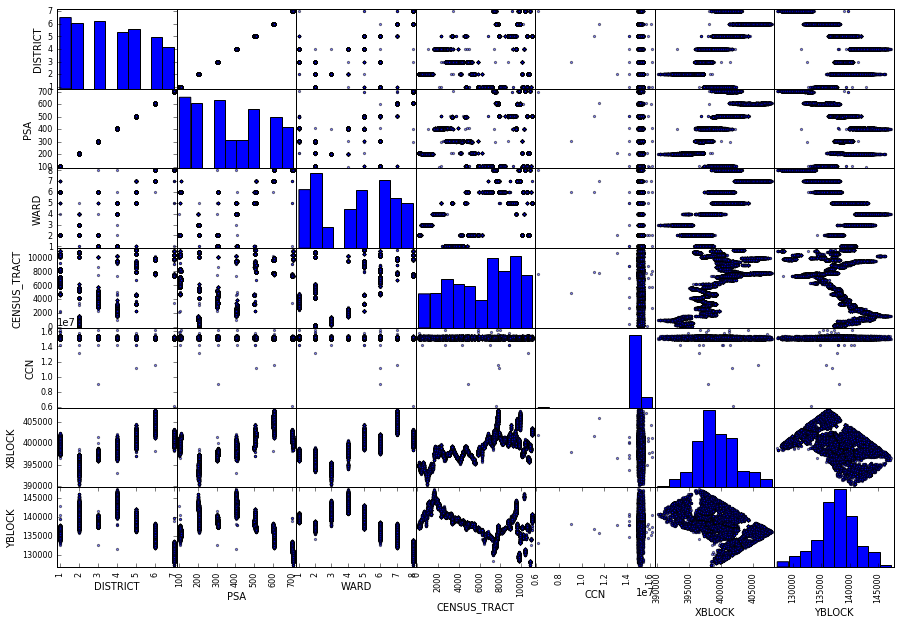

In [8]:
from pandas.tools.plotting import scatter_matrix

# not a good plot, it needs jitter to make the categorical attributes better visualized
ax = scatter_matrix(dc,figsize=(15, 10))


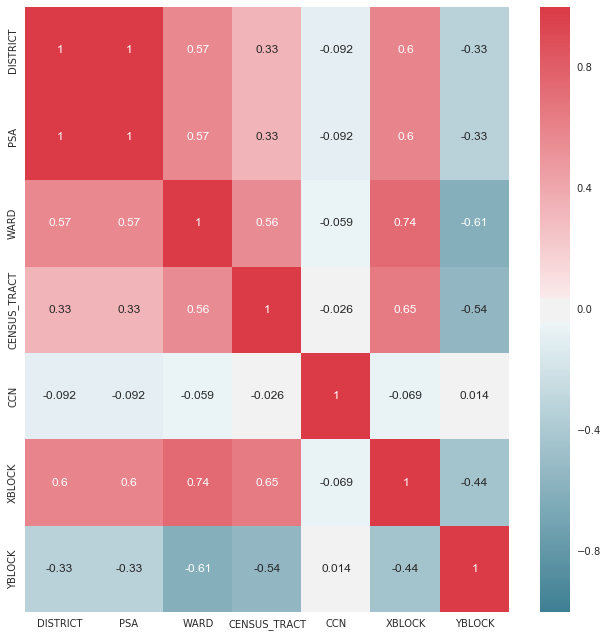

In [9]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(dc.corr(), cmap=cmap, annot=True)

f.tight_layout()

#### guidance
which day has the highest crimes? which day has the lowest?
boxplot of crime type

boxplot of offense
boxplot of method

boxplot of shifts

line plots of offense over days

### 5. Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

#### guidance

* Scatter plot of Method versus Age (are gun-/knife-related crimes dealt with faster than other methods?)
* Plot violent crimes versus age (are violent crimes dealt with faster than property crimes? - hope the answer is 'yes')
* Boxplot of Age versus PSA - are certain police areas more responsive than others?
* (unknown plot) of Offense versus Ward or Voting Precinct - are certain political areas more likely to have a crime


In [ ]:
# Plot of Method versus Age
plt.figure(figsize=(10,10))
plt.scatter(dc['METHOD_Code'], dc['AGE'], s=50, alpha=0.3, color='r', lw=0)
plt.show()

### 6. Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

#### guidance

### 7. Are there other features that could be added to the data or created from existing features? Which ones?

#### New Features
1. Dummy variables are required to indicate if the crime was a violent or property category. These variables would then be used to train a machine learning regression model.
2. It would be nice to have the number of police deployed to a police ward for a shift to see if their numbers are correlated with crimes and their types.
3. It would be nice to have the police improvement campaigns and dollars by ward to determine if these improvements are correlated with crimes and their types.
4. It would be nice if we could get publically-available data for the cases or CCN (perpetrator information, victim demographics, etc.)

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Exceptional Work (<b>10 points total</b>)</h3>
    <ul><li>You have free reign to provide additional analyses.</li>
    <li>One idea: implement dimensionality reduction, then visualize and interpret the results.</li></ul>
</div>

### Coordinates (XBLOCK, YBLOCK)
One obvious visualization tool would be to plot the geo-spatial relationship of the data, and, fortunately, this dataset provides the *approximate* location of the crime (presumably to preserve the privacy of the victim(s)) in grid coordinates (XBLOCK = East offset from the "Origin"; YBLOCK = North offset from the "Origin").  The question is, where is that Origin?

![Identity of Coordinate Origin](images/Coordinates.png "Origin for Location Coordinates")
<p style='text-align:center'>(*Screen capture of description of coordinate origin*)</p>

On the download page for the datasets, next to the "Map Coordinates" field selector, there is a description of the origin, which states that the values are in the Maryland State Plane, NAD 83 map projection.  Further research led to a web page that defined the [Maryland coordinate system](http://www.mgs.md.gov/geology/maryland_coordinate_system.html "Maryland State Coordinate System")

The coordinate system is a Lambert conformal conical projection with two standard parallels (latitudes). This attempts to reduce the distortion of trying to map a flat plane on a curved surface.  With the coordinate system defined, we can then reverse the projection and re-project to a different system that can be used with other mapping/GIS tools.  The transformation methodology came from the National Geospatial Intelligence Agency (NGA), but a more concise explanation of the method was provided by this website: http://www.linz.govt.nz/data/geodetic-system/coordinate-conversion/projection-conversions/lambert-conformal-conic-geographic 

In order to do the coordinate transformations, we need to get several parameters set up first.

|Parameter|Description|Value|
|:--------|:----------|:----|
|a|Semi-major axis of reference ellipsoid (meters)|6378137 (Maryland uses the GRS80 reference)|
|f|Ellipsoidal flattening|1/298.257222101 (GRS80)|
|&theta;<sub>1</sub>|Latitude of first standard parallel (degrees)|38.3 (38&deg; 18' from Maryland definition)|
|&theta;<sub>2</sub>|Latitude of second standard parallel (degrees)|39.45 (39&deg; 27' from Maryland definition)|
|&theta;<sub>0</sub>|Origin Latitude (degrees)|37.66667 (North 37&deg; 40' from Maryland definition)|
|&lambda;<sub>0</sub>|Origin Longitude (degrees)|-81.52918855 (West 81&deg; 31' 45.07877" from Maryland definition)|
|N<sub>0</sub>|False Northing (meters)|0.0 (from Maryland definition)|
|E<sub>0</sub>|False Easting (meters)|400,000 (from Maryland definition)|

From these, we can derive the projection constants

|Constant|Derivation|Value|
|-------|-----------|-----|
|e      |$\sqrt{2f - f^2}$ | 0.081819191|
|m<sub>i</sub>|$\frac{\cos \theta_i}{\sqrt{1-e^2\sin^2 \theta_i}}$|m<sub>1</sub>=0.785787341<br>m<sub>2</sub>=0.773225009|
|t<sub>i</sub>|$\frac{\tan \left[(\frac{\pi}{4})-(\frac{\theta_i}{2})\right]}{\left(\frac{1-e\sin\theta_i}{1+e\sin\theta_i}\right)^\frac{e}{2}}$|t<sub>0</sub>=0.493354296<br>t<sub>1</sub>=0.486512044<br>t<sub>2</sub>=0.474178631|
|n      |$\frac{\ln m_1 - \ln m_2}{\ln t_1 - \ln t_2}$|0.627634132|
|F      |$\frac{m_1}{n(t_1)^n}$|1.967837417|
|&rho;<sub>0</sub>  |$a F t_0^n$|8055622.737|

Now, for each point (i) in our dataset, we must perform the following steps:
1. Adjust the North offset using the false northing - our false northing is 0, so this step is skipped
2. Adjust the East offset using the false easting: $E_i' = E_i - E_0$
3. $\rho_i' = \sqrt{(E_i')^2 + (\rho_0-N_i)^2}$
4. $t_i'= \left(\frac{\rho_i'}{a F}\right)^\frac{1}{n}$
5. $\gamma_i' = \tan^{-1}\left(\frac{E_i'}{\rho_0-N_i}\right)$
6. $\lambda_i = \frac{\gamma_i'}{n}+\lambda_0$ (This is the longitude of the location
7. The calculation for latitude is iterative.
 1. $\theta_{i0} = \frac{\pi}{2}-2\tan^{-1}(t_i')$ (This is our initial estimate of latitude)
 2. $\theta_{i,j} = \frac{\pi}{2}-2\tan^{-1}\left[t_i'\left(\frac{1-e\sin\theta_{i,j-1}}{1+e\sin\theta_{i,j-1}}\right)\right]$ (We use the previous estimate to create a new estimate)
 3. Repeat the previous step until the difference in estimates is negligible (this typically takes three iterations)
8. $\theta_i$ is our estimate of the latitude for the location


In [ ]:
#
#  ---==< Establish some functions and classes for geodetic coordinate transformations >==---
import math

#  ---==< Build a class that handles generic reference ellipsoid parameters >==---
class refEllipsoid:
    #  a = Equatorial radius (meters)
    #  f = Flattening (the degree to which the polar radius is compressed compared to the equatorial radius)
    #  b = Polar radius (meters): f = (a-b)/a; af = a-b; af - a = -b; b = a - af = a(1-f)
    #  e2 = First eccentricity squared: 1 − b2/a2 = 2f − f2
    #  e = First eccentricity
    #  p2 = Second eccentricity squared: a2/b2 − 1 = f(2 − f)/(1 − f)^2
    def __init__(self, equator, flattening):
        #  Provided
        self.a = float(equator)
        self.f = 1.0/float(flattening)
        
        #  Derived
        self.b = self.a * (1.0 - self.f)
        self.e2 = (2.0 * self.f) - self.f**2
        self.e = math.sqrt(self.e2)
        self.p2 = (self.a**2 / self.b**2) - 1.0

#  ---==< Create Ellipsoids for the GRS80 (origin) and WGS84 (destination) systems >==---
GRS80 = refEllipsoid(6378137.0,298.257222100882711)  #  Define the Geodetic Reference System 1980 (GRS80) ellipsoid
WGS84 = refEllipsoid(6378137.0,298.257223563)  #  Define the World Geodetic Survey 1984 (WGS84) ellipsoid

#  ---==< Generic function to convert individual angular components to floating-point degrees >==---
def DMS(degrees, minutes, seconds):
    sign = 1.0
    if degrees < 0:
        sign = -1.0
    return sign * (math.fabs(float(degrees)) + (float(minutes) / 60.0) + (float(seconds) / 3600.0))

#  ---==< Build a class to store the origin of a coordinate system >==---
class coordOrigin:
    origin = {'lat':0.0, 'lon': 0.0}
    parallel = {1:0.0, 2:0.0}
    false = {'n':0.0, 'e':0.0}
                        
    def __init__(self,latOrigin,lonOrigin,parallel1,parallel2,northing,easting):
        self.origin['lat'] = math.radians(latOrigin)
        self.origin['lon'] = math.radians(lonOrigin)
        self.parallel[1] = math.radians(parallel1)
        self.parallel[2] = math.radians(parallel2)
        self.false['n'] = float(northing)
        self.false['e'] = float(easting)
        
#  ---==< Set the origin for the Maryland state coordinate system >==---
#  Origin Latitude = 37 40 0; Longitude = -81 31 45.07877
#  Central meridian = -77 0 0
#  First parallel = 38 18 0; Second parallel = 39 27 0
#  False Northing = 0; False Easting = 400000

MD = coordOrigin(DMS(37,40,0),DMS(-77,0,0),DMS(38,18,0),DMS(39,27,0),0,400000)

#  ---==< Build a class to handle Lambert conformal conical projections >==---
class Lambert:
    def __init__(self):
        self.m1 = Lambert._m(MD.parallel[1])
        self.m2 = Lambert._m(MD.parallel[2])
        self.t0 = Lambert._t(MD.origin['lat'])
        self.t1 = Lambert._t(MD.parallel[1])
        self.t2 = Lambert._t(MD.parallel[2])
        self.n = (math.log(self.m1) - math.log(self.m2))/(math.log(self.t1)-math.log(self.t2))
        self.F = self.m1 / (self.n * self.t1**self.n)
        self.p0 = GRS80.a * self.F * self.t0**self.n
        
    @staticmethod
    def _m(parallel):
        return math.cos(float(parallel)) / math.sqrt(1.0 - (GRS80.e2 * math.sin(float(parallel))**2))

    @staticmethod
    def _t(parallel):
        return math.tan((math.pi / 4.0) - (float(parallel) / 2.0)) / ((1 - (GRS80.e * math.sin(float(parallel)))) / (1 + (GRS80.e * math.sin(float(parallel)))))**(GRS80.e / 2.0)
        
Projection = Lambert()

#  ---==< Create a function to transform Lambert conical offsets to Geodetic coordinates >==---
def transform(ptEast, ptNorth):
    Nprime = ptNorth - MD.false['n']
    Eprime = ptEast - MD.false['e']
    Pprime = math.sqrt(Eprime**2 + (Projection.p0 - Nprime)**2)
    if (Projection.n < 0):
        Pprime = 0 - Pprime
    Tprime = (Pprime/(WGS84.a * Projection.F))**(1.0/Projection.n)
    Gprime = math.atan(Eprime/(Projection.p0 - Nprime))
    Projection.Longitude = math.degrees((Gprime / Projection.n) + MD.origin['lon'])
    oldLat = 0.0
    newLat = (math.pi/2.0) - 2.0 * math.atan(Tprime)
    while (math.fabs(newLat - oldLat) > 1.0e-10):
        oldLat = newLat
        newLat = (math.pi/2.0) - (2.0 * math.atan(Tprime * ((1.0 - WGS84.e * math.sin(oldLat))/(1.0 + WGS84.e * math.sin(oldLat)))**(GRS80.e/2.0)))
    Projection.Latitude = math.degrees(newLat)
    return [Projection.Latitude, Projection.Longitude]

#
#  Test the transformation equations.
#  According to the NGA tool 'GeoTrans', the Lambert coordinates 397,229; 138,975 transform to Latitude 38.91864, Longitude -77.03195.
print transform(397229,138975)

In [ ]:
# ---==< Create a Latitude and Longitude field, then populate them by transforming the coordinates >==---
dc['Latitude'] = -9999.9999
dc['Longitude'] = -9999.9999
dc[['Latitude','Longitude']] = list(map(transform,dc['XBLOCK'],dc['YBLOCK']))

dc

### Visualization - Map
After transforming the coordinates to Geodetic (Latitude/Longitude) we can plot the locations with a mapping/GIS tool.  In this example, we used a tool developed by Mercury Solutions, Inc. (Tom Elkins' company) that plots multiple tactical data sources.
![Crime data on map](images/Data_on_Map.png "Crime locations on DC Map")

### Data By Geo-Political Identifiers
#### Political Ward
![Crimes by Ward](images/CrimesByWard.png "Crimes by Ward")
#### Police District
![Crimes by Police District](images/DistrictBorderOverlay.png "Crimes by Police District")
<p style='text-align:center'>Police District Map from http://mpdc.dc.gov/sites/default/files/dc/sites/mpdc/page_content/images/districtmap_2012.jpg
Modified in PowerPoint to remove the background color, and resized to fit over the data plot</p>
#### Advisory Neighborhood Commission
![Crimes by ANC](images/CrimesByANC.png "Crimes by ANC")


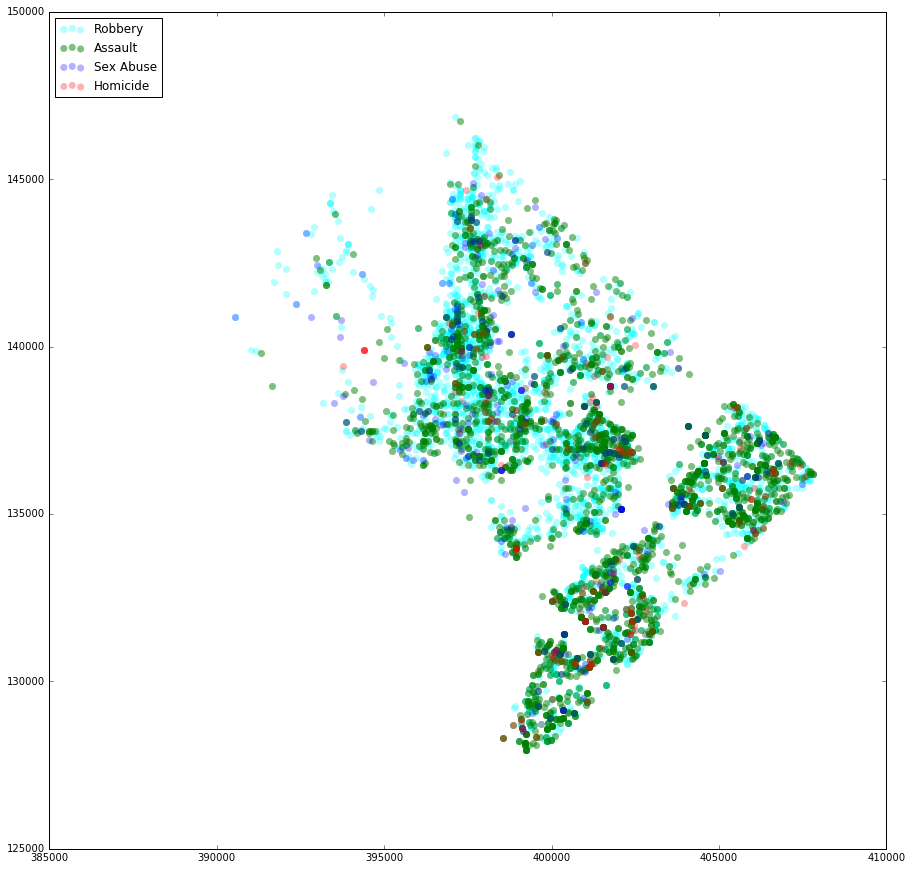

In [16]:
# Plot of violent crimes
plt.figure(figsize=(15,15))
plt.scatter(dc['XBLOCK'][dc['OFFENSE']=='ROBBERY'], dc['YBLOCK'][dc['OFFENSE']=='ROBBERY'], s=50, alpha=0.3, color=[0.0,1.0,1.0], lw=0, label='Robbery')
plt.scatter(dc['XBLOCK'][dc['OFFENSE']=='ASSAULT W/DANGEROUS WEAPON'], dc['YBLOCK'][dc['OFFENSE']=='ASSAULT W/DANGEROUS WEAPON'], s=50, alpha=0.5, color='g', lw=0, label='Assault')
plt.scatter(dc['XBLOCK'][dc['OFFENSE']=='SEX ABUSE'], dc['YBLOCK'][dc['OFFENSE']=='SEX ABUSE'], s=50, alpha=0.3, color='b', lw=0, label='Sex Abuse')
plt.scatter(dc['XBLOCK'][dc['OFFENSE']=='HOMICIDE'], dc['YBLOCK'][dc['OFFENSE']=='HOMICIDE'], s=50, alpha=0.3, color='r', lw=0, label='Homicide')
plt.legend(loc='upper left')
plt.show()